# Libraries being Used

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import datetime
warnings.filterwarnings("ignore")

In [2]:
#to center align the graphs
from IPython.core.display import HTML
HTML("""<style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>""")

# DATA CLEANING

### Loading Data

In [3]:
#loading manually cleaned up excel file - deletion of Unused Columns

data = pd.read_csv("loan.csv", header = 0)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Dropping Irrelevant Columns

In [5]:
#dropping below mentioned columns 
drop_col = ["acc_now_delinq","acc_open_past_24mths","all_util","annual_inc_joint","application_type","avg_cur_bal","bc_open_to_buy","bc_util","delinq_amnt","dti_joint","il_util","initial_list_status","inq_fi","inq_last_12m",
"max_bal_bc","mo_sin_old_il_acct",
"mo_sin_old_rev_tl_op",
"mo_sin_rcnt_rev_tl_op",
"mo_sin_rcnt_tl",
"mort_acc",
"mths_since_last_major_derog",
"mths_since_rcnt_il",
"mths_since_recent_bc",
"mths_since_recent_bc_dlq",
"mths_since_recent_inq",
"mths_since_recent_revol_delinq",
"num_accts_ever_120_pd",
"num_actv_bc_tl",
"num_actv_rev_tl",
"num_bc_sats",
"num_bc_tl",
"num_il_tl",
"num_op_rev_tl",
"num_rev_accts",
"num_rev_tl_bal_gt_0",
"num_sats",
"num_tl_120dpd_2m",
"num_tl_30dpd",
"num_tl_90g_dpd_24m",
"num_tl_op_past_12m",
"open_acc_6m",
"open_il_12m",
"open_il_24m",
"open_il_6m",
"open_rv_12m",
"open_rv_24m",
"pct_tl_nvr_dlq",
"percent_bc_gt_75",
"policy_code",
"pymnt_plan",
"tot_coll_amt",
"tot_cur_bal",
"tot_hi_cred_lim",
"total_bal_ex_mort",
"total_bal_il",
"total_bc_limit",
"total_cu_tl",
"total_il_high_credit_limit",
"total_rev_hi_lim",
"url",
"tax_liens",
"chargeoff_within_12_mths",
"collections_12_mths_ex_med",
"desc"           
]


<blockquote>Reasoning : The below mentioned columns are irrelevant to the case study as most of them pertain to joint account loan. Additionaly we havent retained column that has same value filled throuhgout </blockquote>

In [6]:
#this would be our target dataset
loan = data.drop(drop_col, axis = 1)
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         39717 non-null  int64  
 1   member_id                  39717 non-null  int64  
 2   loan_amnt                  39717 non-null  int64  
 3   funded_amnt                39717 non-null  int64  
 4   funded_amnt_inv            39717 non-null  float64
 5   term                       39717 non-null  object 
 6   int_rate                   39717 non-null  object 
 7   installment                39717 non-null  float64
 8   grade                      39717 non-null  object 
 9   sub_grade                  39717 non-null  object 
 10  emp_title                  37258 non-null  object 
 11  emp_length                 38642 non-null  object 
 12  home_ownership             39717 non-null  object 
 13  annual_inc                 39717 non-null  flo

In [7]:
#finding % of missing value 
loan.isnull().sum()/len(loan)*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.000000
earliest_cr_line               0.000000
inq_last_6mths                 0.000000


<blockquote><b>Reasoning:- For better analysis purpose we will further remove columns that have missing values greater than 50%.</b></blockquote>

In [8]:
#dropping 3 more columns (mentioned below)
drop_col1 = ["verification_status_joint","next_pymnt_d","mths_since_last_record"]

In [9]:
loan = loan.drop(drop_col1, axis = 1)
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [10]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.043260
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.204324
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.000000
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.000000
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


### Data Cleaning

#### Dates Cleaning

<blockquote> Using pd.to_datetime - <i>Keeps popping up error Out of Time Bound </i>- To bypass this we would have to change the format of date  stored in excel.Since we donot want to tamper with the source data we are using simple string slicer to extract the date columns </blockquote>

In [11]:
#issue_d 
loan["issue_d_month"] = loan["issue_d"].apply(lambda x:x[:3])
loan["issue_d_year"] = loan["issue_d"].apply(lambda x:x[4:])

In [12]:
#earliest_cr_line
loan["earliest_cr_line_month"] = loan["earliest_cr_line"].apply(lambda x:x[:3])
loan["earliest_cr_line_year"] = loan["earliest_cr_line"].apply(lambda x:x[4:])

In [13]:
#member_id and id unique value
print(loan["member_id"].nunique())
print(loan["id"].nunique())
#This means every loan id is applied by a unique member. i.e. we have 39717

39717
39717


<blockquote> This means every loan id is applied by a unique member. i.e. we have 39717 unique entries. We just need to work with id column only</blockquote>

#### Cleaning Employement Length

In [14]:
#converting Employement Length to numeric
loan["emp_length"] = loan["emp_length"].str.replace("years","")
loan["emp_length"] = loan["emp_length"].str.replace("year","")
loan["emp_length"] = loan["emp_length"].str.replace("+","")
loan["emp_length"] = loan["emp_length"].str.replace("< 1","0")

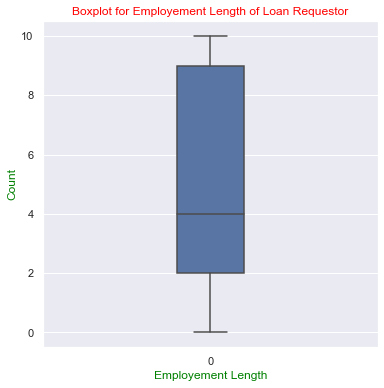

In [15]:
#Analysing emp_length
sns.set(rc = {"figure.figsize" : (6,6)})
sns.boxplot(data = loan["emp_length"], width = 0.2)
plt.title("Boxplot for Employement Length of Loan Requestor",fontdict = {"fontweight" : 20, "color" : "red"})
plt.xlabel("Employement Length",fontdict = {"fontweight" : 10, "color" : "green"})
plt.ylabel("Count",fontdict = {"fontweight" : 10, "color" : "green"})
plt.show()

<blockquote>This means that the category <b>"4"</b> is median. We decide to to maintain a new column "emp_length_modified" with median 4 whilst the original column na is filled a new category "Not Available"</blockquote>

In [16]:
loan["emp_length_modified"] = loan["emp_length"]
loan["emp_length_modified"] = loan["emp_length_modified"].fillna("4")
loan["emp_length"] = loan["emp_length"].fillna("NA")

In [17]:
loan["emp_title"] = loan["emp_title"].fillna("NA")

In [18]:
#converting emp_length to numeric
loan["emp_length_modified"] = loan["emp_length_modified"].astype("int64")

#### Cleaning Months since Last Delinq

In [19]:
#filling empty columns with 0
loan["mths_since_last_delinq"] = loan["mths_since_last_delinq"].fillna(0)

#### Cleaning Interest Rate

In [20]:
#converting the column type to percentage
loan[["int_rate"]] = loan[["int_rate"]].apply(lambda x:x.str.rstrip("%").astype("float64"))

#### Cleaning Revolving Line Utilization Rate

In [21]:
#converting the column type to percentage
loan[["revol_util"]] = loan[["revol_util"]].apply(lambda x:x.str.rstrip("%").astype("float64"))

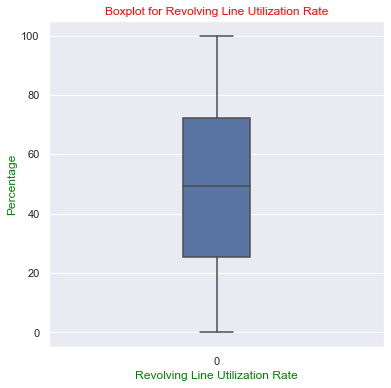

In [22]:
#Analyzing Revolving Line Utilization Rate
sns.set(rc = {"figure.figsize" : (6,6)})
sns.boxplot(data = loan["revol_util"], width = 0.2)
plt.title("Boxplot for Revolving Line Utilization Rate",fontdict = {"fontweight" : 20, "color" : "red"})
plt.xlabel("Revolving Line Utilization Rate",fontdict = {"fontweight" : 10, "color" : "green"})
plt.ylabel("Percentage",fontdict = {"fontweight" : 10, "color" : "green"})
plt.show()

In [23]:
loan["revol_util"].describe()

count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

<blockquote>This means that median value is at <b>49.3</b>. We decide to fill the na values with <b>median value.</b></blockquote>

In [24]:
loan["revol_util"] = loan["revol_util"].fillna(49.3)

#### Cleaning Public record of Bankruptcies

In [25]:
loan["pub_rec_bankruptcies"].median()

0.0

<blockquote> The NA here can be filled with 0 which implies that there is no public record of bankruptices availble - Additionally the median is 0 </blockquote>

In [26]:
loan["pub_rec_bankruptcies"] = loan["pub_rec_bankruptcies"].fillna(0)

#### Addition of a Modified Subgrade Column.

<blockquote> We strip off the character (basically the grade) associated with the each subgrade </blockquote>

In [27]:
loan["modified_sub_grade"] = loan["sub_grade"].apply(lambda x:x[1:])

### Cleaning Outliers

#### Sanity Check 1 : Funded Amount should be less than Requested Amount

In [28]:
#checking for any funded amount greater than requested amount
temp1 = np.where(loan["funded_amnt"]>loan["loan_amnt"], True, False)
count = np.unique(temp1)
print(count)

[False]


<blockquote> We can conclude that there is no data where the funded amount is greater than requested amount </blockquote>

#### Outlier Treatment : Annual Income

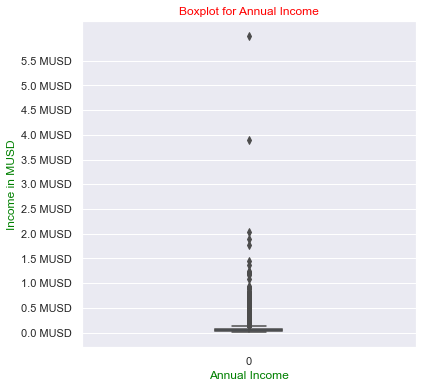

In [29]:
#outlier treatment for annual income
sns.set(rc = {"figure.figsize" : (6,6)})
sns.boxplot(data = loan["annual_inc"], width = 0.2)
plt.title("Boxplot for Annual Income",fontdict = {"fontweight" : 20, "color" : "red"})
plt.xlabel("Annual Income",fontdict = {"fontweight" : 10, "color" : "green"})
plt.ylabel("Income in MUSD",fontdict = {"fontweight" : 10, "color" : "green"})
ticks = np.arange(0,6000000,500000)
label = ["{} MUSD".format(i/1000000) for i in ticks]
plt.yticks(ticks,label)
plt.show()

<blockquote> We decide to remove any value that is outisde 1.5 Inter Quartile Range. </blockquote>

In [30]:
#computing iqr
iqr1 = loan["annual_inc"].quantile(0.75) - loan["annual_inc"].quantile(0.25)
limit1 = 1.5*iqr1
loan = loan[loan["annual_inc"]<(loan["annual_inc"].quantile(0.75)+limit1)]

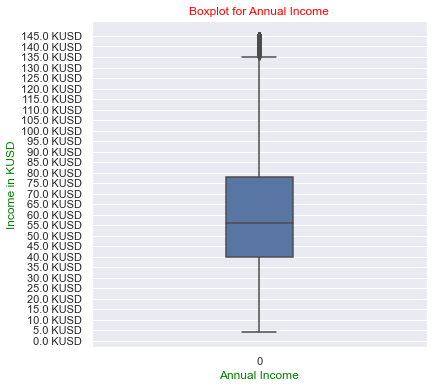

In [31]:
sns.set(rc = {"figure.figsize" : (6,6)})
sns.boxplot(data = loan["annual_inc"], width = 0.2)
plt.title("Boxplot for Annual Income",fontdict = {"fontweight" : 20, "color" : "red"})
plt.xlabel("Annual Income",fontdict = {"fontweight" : 10, "color" : "green"})
plt.ylabel("Income in KUSD",fontdict = {"fontweight" : 10, "color" : "green"})
ticks = np.arange(0,150000,5000)
label = ["{} KUSD".format(i/1000) for i in ticks]
plt.yticks(ticks,label)
plt.show()

In [32]:
#creating new column
conditions = [
    (loan['annual_inc'] < loan['annual_inc'].quantile(0.33)),
    (loan['annual_inc'] >= loan['annual_inc'].quantile(0.33)) & (loan['annual_inc'] < loan['annual_inc'].quantile(0.66)),
    (loan['annual_inc'] >= loan['annual_inc'].quantile(0.66))
]
values = ['low','mid','high']
loan['annual_inc_grp']=np.select(conditions, values)
loan.head(20)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,emp_length_modified,modified_sub_grade,annual_inc_grp
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,171.62,May-16,0.0,Dec,11,Jan,85,10,2,low
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,Dec,11,Apr,99,0,4,low
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,649.91,May-16,0.0,Dec,11,Nov,01,10,5,low
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,Dec,11,Feb,96,10,1,mid
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,67.79,May-16,0.0,Dec,11,Jan,96,1,5,high
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,161.03,Jan-16,0.0,Dec,11,Nov,04,3,4,low
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,...,1313.76,May-16,0.0,Dec,11,Jul,05,8,5,mid
7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,E1,...,111.34,Dec-14,0.0,Dec,11,Jan,07,9,1,mid
8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,...,152.39,Aug-12,0.0,Dec,11,Apr,04,4,2,low
9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,...,121.45,Mar-13,0.0,Dec,11,Sep,04,0,5,low


<blockquote> We have further checked for outliers with column <b>term</b>, <b>int_rate</b>, <b>dti</b>, <b>installment</b>. There is not outlier treatment required for the mentioned columns. Hence it has not been included in the notebook inorder to avoid clutter. </blockquote>

#### Outlier Treatment : Open Account

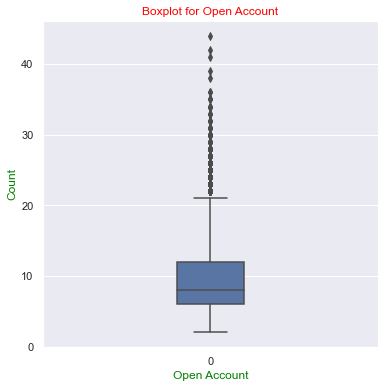

In [33]:
sns.set(rc = {"figure.figsize" : (6,6)})
sns.boxplot(data = loan["open_acc"], width = 0.2)
plt.title("Boxplot for Open Account",fontdict = {"fontweight" : 20, "color" : "red"})
plt.xlabel("Open Account",fontdict = {"fontweight" : 10, "color" : "green"})
plt.ylabel("Count",fontdict = {"fontweight" : 10, "color" : "green"})
plt.show()

<blockquote> We decide to remove any value that is outisde 1.5 Inter Quartile Range. </blockquote>

In [34]:
#computing iqr
iqr2 = loan["open_acc"].quantile(0.75) - loan["open_acc"].quantile(0.25)
limit2 = 1.5*iqr2
loan = loan[loan["open_acc"]<(loan["open_acc"].quantile(0.75)+limit2)]

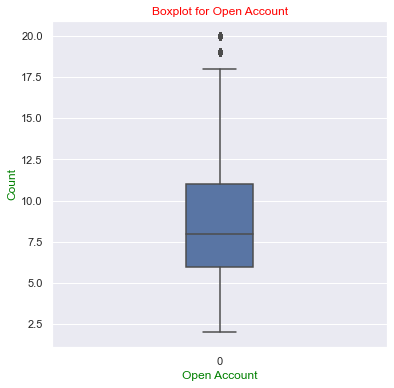

In [35]:
sns.set(rc = {"figure.figsize" : (6,6)})
sns.boxplot(data = loan["open_acc"], width = 0.2)
plt.title("Boxplot for Open Account",fontdict = {"fontweight" : 20, "color" : "red"})
plt.xlabel("Open Account",fontdict = {"fontweight" : 10, "color" : "green"})
plt.ylabel("Count",fontdict = {"fontweight" : 10, "color" : "green"})
plt.show()

# Loan Data Set

In [36]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,emp_length_modified,modified_sub_grade,annual_inc_grp
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,171.62,May-16,0.0,Dec,11,Jan,85,10,2,low
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,Dec,11,Apr,99,0,4,low
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,649.91,May-16,0.0,Dec,11,Nov,01,10,5,low
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,Dec,11,Feb,96,10,1,mid
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,67.79,May-16,0.0,Dec,11,Jan,96,1,5,high


# OVERVIEW

</blockquote> The target column is Loan Status. Our analysis and insights will be based off of this column </blockquote>

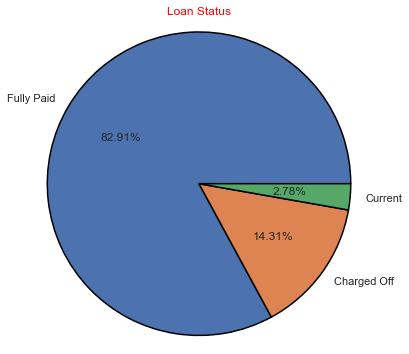

In [37]:
sns.set(rc = {"figure.figsize" : (6,6)})
loan["loan_status"].value_counts().plot.pie(autopct = "%1.2f%%",wedgeprops = {"edgecolor" : "black",'linewidth': 1.5,'antialiased': True})
plt.title("Loan Status",fontdict = {"fontweight" :20, "color" : "red"})
plt.ylabel("")
plt.axis("equal")
plt.show()


In [38]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37189 entries, 0 to 39716
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       37189 non-null  int64  
 1   member_id                37189 non-null  int64  
 2   loan_amnt                37189 non-null  int64  
 3   funded_amnt              37189 non-null  int64  
 4   funded_amnt_inv          37189 non-null  float64
 5   term                     37189 non-null  object 
 6   int_rate                 37189 non-null  float64
 7   installment              37189 non-null  float64
 8   grade                    37189 non-null  object 
 9   sub_grade                37189 non-null  object 
 10  emp_title                37189 non-null  object 
 11  emp_length               37189 non-null  object 
 12  home_ownership           37189 non-null  object 
 13  annual_inc               37189 non-null  float64
 14  verification_status   

In [39]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,emp_length_modified
count,3.718900e+04,3.718900e+04,37189.000000,37189.000000,37189.000000,37189.000000,37189.000000,37189.000000,37189.000000,37189.000000,...,37189.000000,37189.000000,37189.000000,37189.000000,37189.00000,37189.000000,37189.000000,37189.000000,37189.000000,37189.000000
mean,6.830586e+05,8.504629e+05,10842.321654,10587.747721,10061.833017,11.937015,313.500693,61136.257181,13.423118,0.143833,...,11708.564062,11149.471666,9451.937559,2163.423956,1.33226,91.870367,11.852625,2566.790256,0.043588,4.895695
std,2.105958e+05,2.654687e+05,7166.932175,6906.922808,6846.597763,3.679645,199.517518,28177.208270,6.667641,0.486497,...,8641.322991,8545.114055,6768.739041,2477.055580,7.13134,667.943607,144.250504,4261.470584,0.204968,3.502517
min,5.473400e+04,7.472400e+04,500.000000,500.000000,0.000000,5.420000,15.690000,4000.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.163820e+05,6.671290e+05,5000.000000,5000.000000,5000.000000,8.940000,163.760000,40000.000000,8.320000,0.000000,...,5478.387981,4994.680000,4500.000000,643.140000,0.00000,0.000000,0.000000,213.300000,0.000000,2.000000
50%,6.645920e+05,8.496050e+05,9600.000000,9250.000000,8500.000000,11.720000,272.920000,56000.000000,13.540000,0.000000,...,9553.328841,8979.760000,8000.000000,1301.530000,0.00000,0.000000,0.000000,523.230000,0.000000,4.000000
75%,8.372150e+05,1.046913e+06,15000.000000,14500.000000,13950.000000,14.350000,411.610000,78000.000000,18.680000,0.000000,...,15882.012920,15204.560000,12999.990000,2698.450000,0.00000,0.000000,0.000000,3163.430000,0.000000,8.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,145008.000000,29.990000,11.000000,...,58563.679930,58563.680000,35000.020000,23563.680000,180.20000,29623.350000,7002.190000,36115.200000,2.000000,10.000000


# UNIVARIATE ANALYSIS

In [40]:
#custom function to plot bar graphs for loan status = "Charged Off"
def univariatebarplot(variable):
    temp = loan
    temp = loan.groupby(by =loan["loan_status"])[variable].value_counts(normalize=True).rename("Percentage Defaulters").mul(100).reset_index()
    temp = temp[temp["loan_status"] == "Charged Off"]
    sns.set(rc = {"figure.figsize" : (15,10)})
    ax = sns.barplot(y = temp[variable], x = temp["Percentage Defaulters"], data = temp)
    total = len(temp[variable])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

In [41]:
#custom function to plot rank plots
def rank_table(x):
    df=pd.DataFrame()
    df=pd.crosstab(index=x,columns='count')
    df1=df.sort_values(by=['count'],ascending=False)
    df1.insert(0,'rank',[i for i in range(1,len(df1)+1)])
    a=plt.gca()
    a.scatter(df1['rank'] ,df1['count'] , c='red', alpha=1, edgecolors='none')
    a.set_yscale('log')
    a.set_xscale('log')
    plt.xlabel('rank', fontsize=12)
    plt.ylabel('count', fontsize=12)

In [42]:
#custom function to print subplots
def univariatesubplotter(variable):
    sns.set(rc = {"figure.figsize" : (15,10)})
    plt.subplot(121)
    rank_table(loan[variable])
    plt.title("Rank Plot of {}".format(loan[variable].name), fontdict = {"fontweight" :20, "color" : "blue"})
    plt.subplot(122)
    univariatebarplot(variable)
    plt.title("Bar Plot of {}".format(variable), fontdict = {"fontweight" :20, "color" : "blue"})
    plt.suptitle("Univariate Analysis of {}".format(variable), y=1)
    plt.tight_layout(pad=3.0)
    plt.show()

### CATEGORICAL UNIVARIATE ANALYSIS

#### PURPOSE 

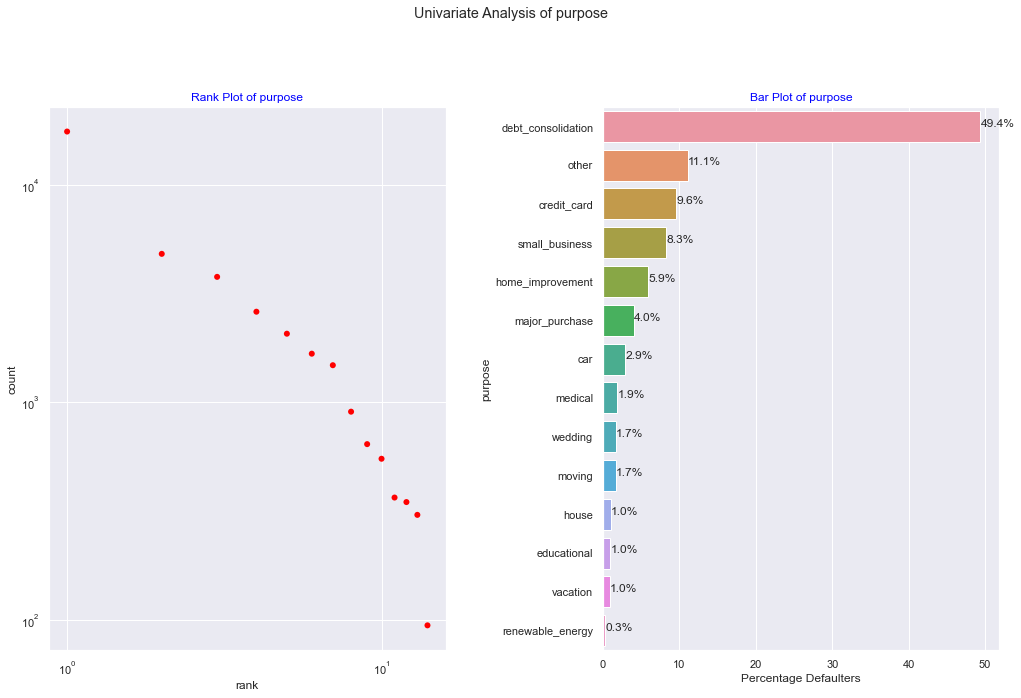

In [43]:
univariatesubplotter("purpose")

<blockquote> The log - log rank v/s frequency plot of Purpose follows a Zipf Distribution. Additionaly it could possibly serve as an independent variable </blockquote>

<blockquote> We can conclude that Requestors for <b> debt consolidation </b> are the highest defaulters with almost half (49.4%) of total count. The dominance is clearly visible in the rank plot. </blockquote>

<blockquote> <b> Initial Hypothesis </b> : Debt Consolidation being the top purpose loan defaulters seems fairly straightforward. Even though you might receive lower interest when you combine loan you might end up with longer payment terms which ends up with more payment than planned.  </blockquote>

#### GRADE

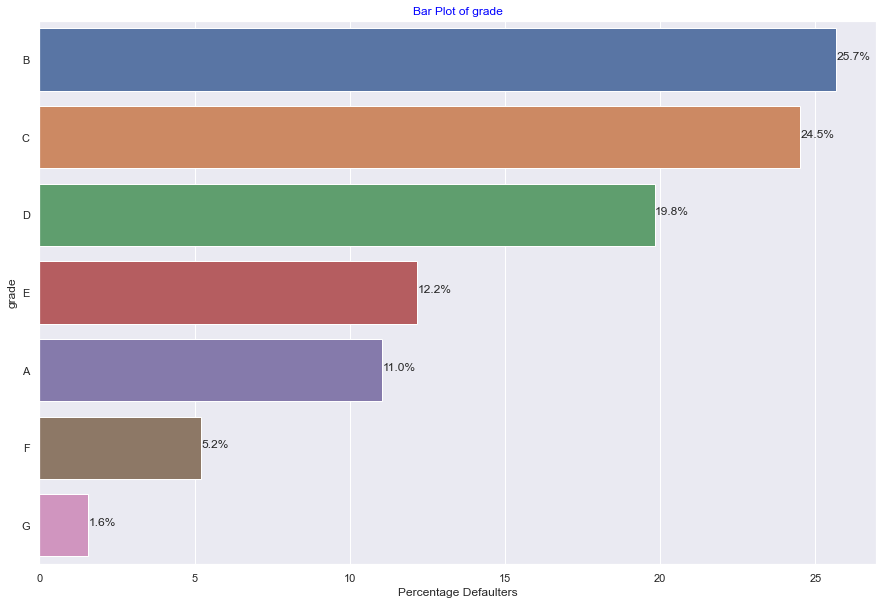

In [44]:
univariatebarplot("grade")
plt.title("Bar Plot of {}".format("grade"), fontdict = {"fontweight" :20, "color" : "blue"})
plt.show()

<blockquote> We can conclude that loan types that are categorized under <b> B, C, D </b> are most likely to default compared to rest of others. Grade <b> G </b> seems to default the least. </blockquote>

#### MODIFIED SUB GRADE

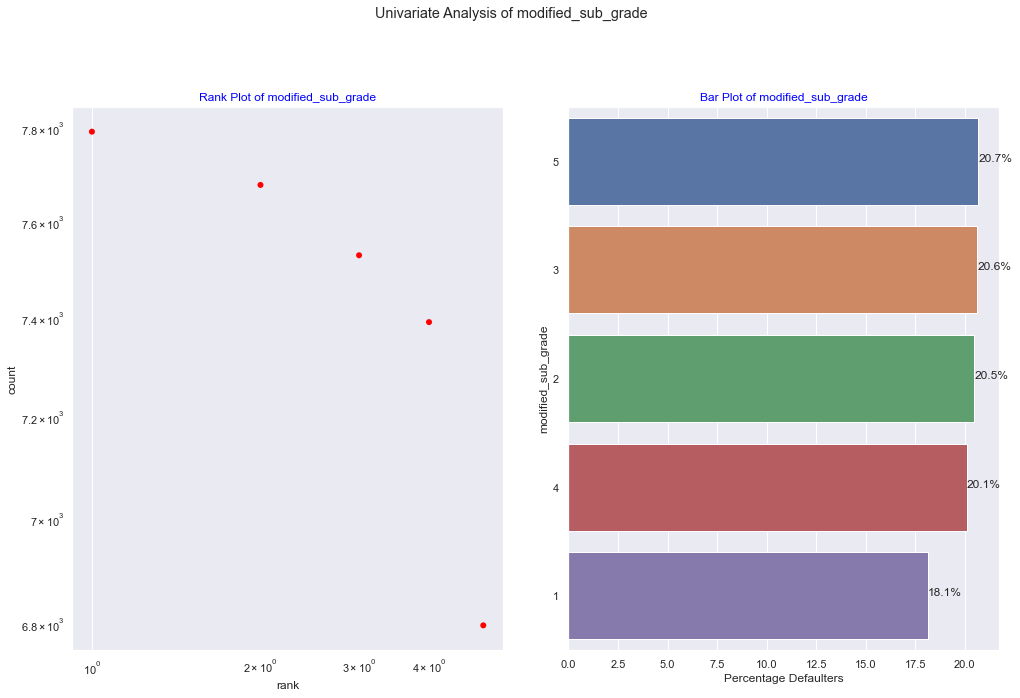

In [45]:
univariatesubplotter("modified_sub_grade")

<blockquote> Hence we can conclude that on a holistic level within a grade there isn't a specific type of sub grade type that has a better chance to default. This is verified by the rank plot which shows there is no much difference between the count of the 5 types of sub grades (except for the last one - which means that a sub grade of 1 can be considered slightly better but there is practically no difference between the rest of them. Hence SubGrade can be dropped for Analysis </blockquote>

#### TERM

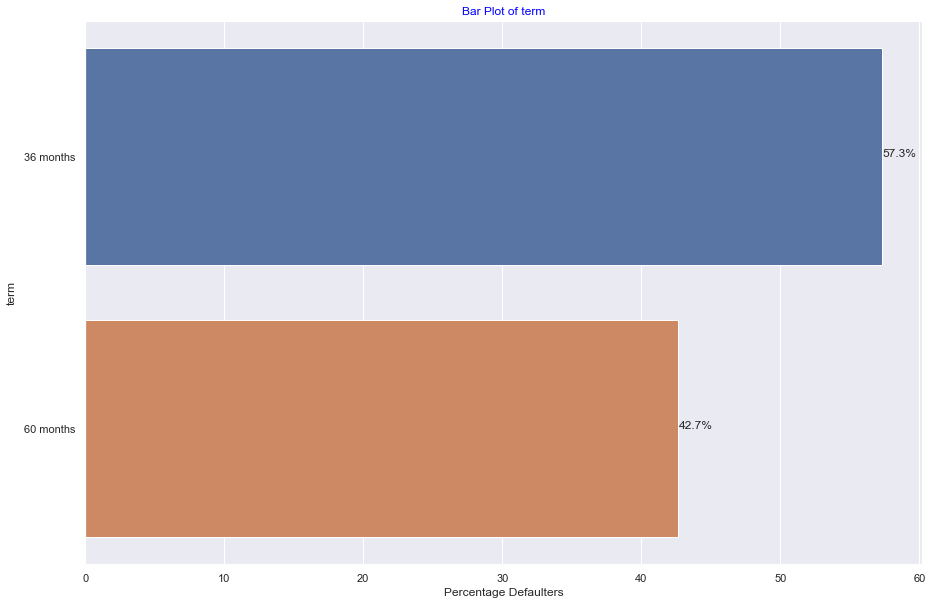

In [46]:
univariatebarplot("term")
plt.title("Bar Plot of {}".format("term"), fontdict = {"fontweight" :20, "color" : "blue"})
plt.show()

<blockquote> Based on the above visualization, it would be a fair assumption to state that the loan repayment <b> doesnot </b>  have a significant effect on defaulting cases of loans.   </blockquote>

#### HOME OWNERSHIP

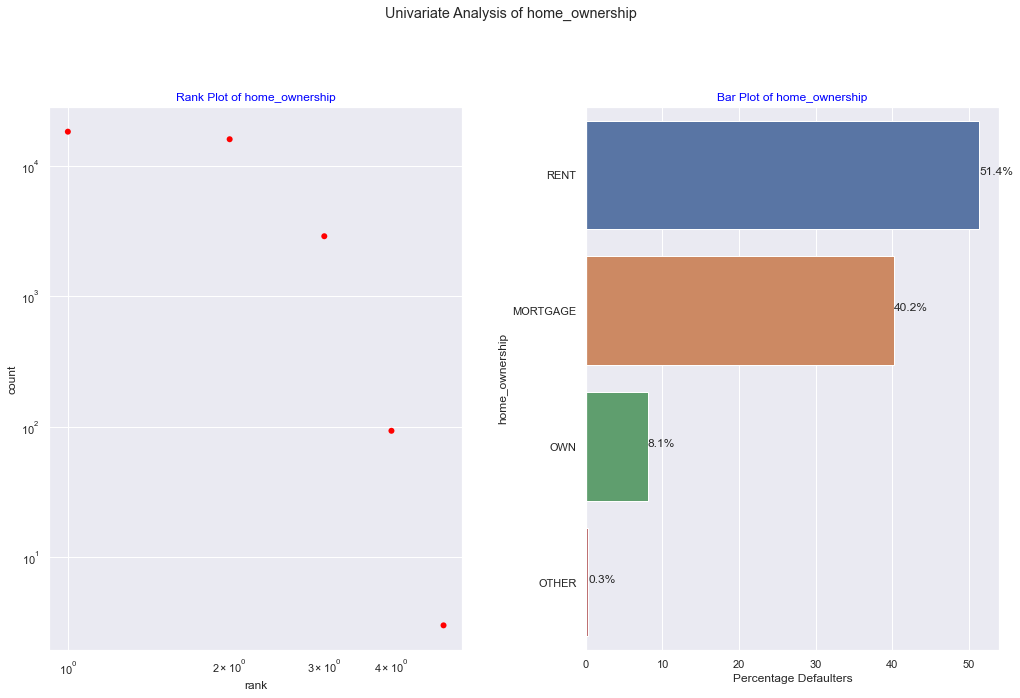

In [47]:
univariatesubplotter("home_ownership")

<blockquote> People who lives on <b>Rent</b> or has their house <b>Mortaged</b> will default more frequently (~ approx 5 times)  more than people who own a house. </blockquote>

<blockquote> <b> Initial Hypothesis </b> : The explanation seems fairly straightforward. People who own a house will have a stable income and hence will be less likely to default  </blockquote>

#### Loan Issue Month

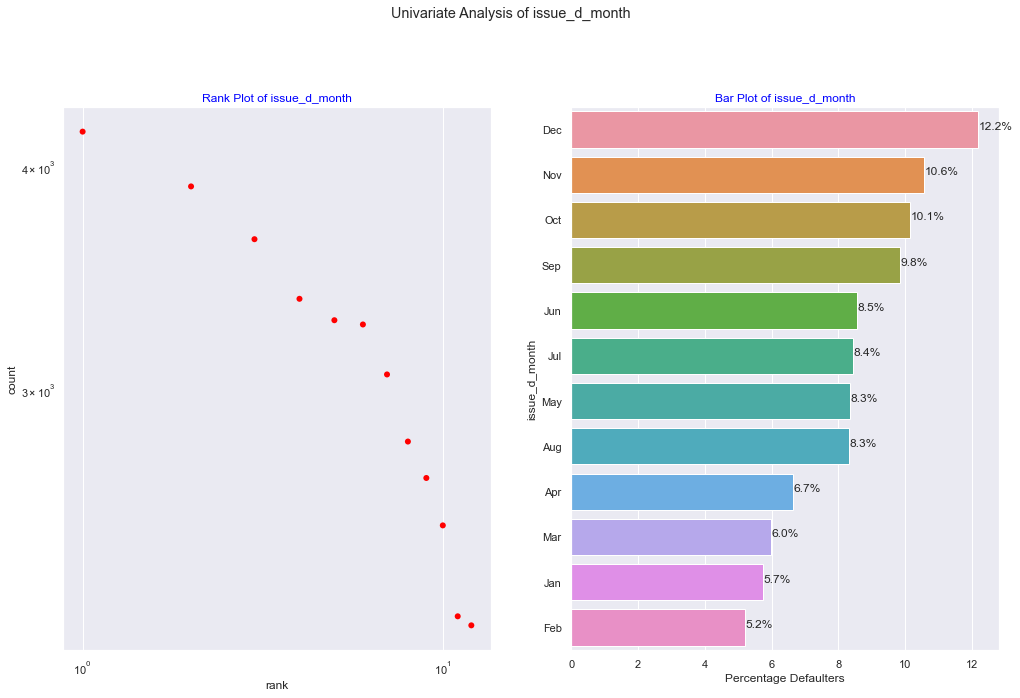

In [48]:
univariatesubplotter("issue_d_month")

<blockquote> Loans issued at the end of the year tend to default more than loans issued at the beginning of the year. The rank plot follows Zipf Distribution which implies majority of the loans that tend to go default are issued during year ends. </blockquote>

<blockquote> <b> Initial Hypothesis </b> : 
   
    1. A possible explanation could be that year end time is when you track your expenses or it could probably be the time when we have to settle up our credit card expenses and plan for holiday expenses. Inorder to do this we mostly would consolidate our debts.
    
    2. Another possible explantion for this could be that during end of year people could apply for loans for vacations, holiday expenses. This is more likely to default compared to a loan that is taken during year start which could be most probably for non holiday related activity  

</blockquote>

#### VERIFICATION STATUS

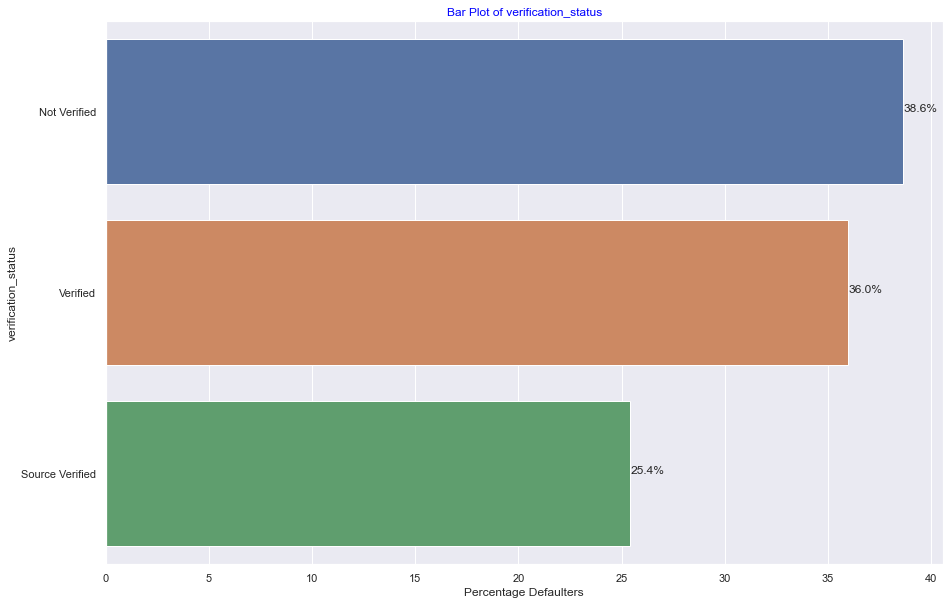

In [49]:
univariatebarplot("verification_status")
plt.title("Bar Plot of {}".format("verification_status"), fontdict = {"fontweight" :20, "color" : "blue"})
plt.show()

<blockquote> An interesting conclusion we could make out of this visualization is that the verification status done by the bank is not effective. It only becomes slightly effectively only when the source is verified. Overall the difference is small hence verification status can be skipped for analysis  </blockquote>

#### ADDR_STATE

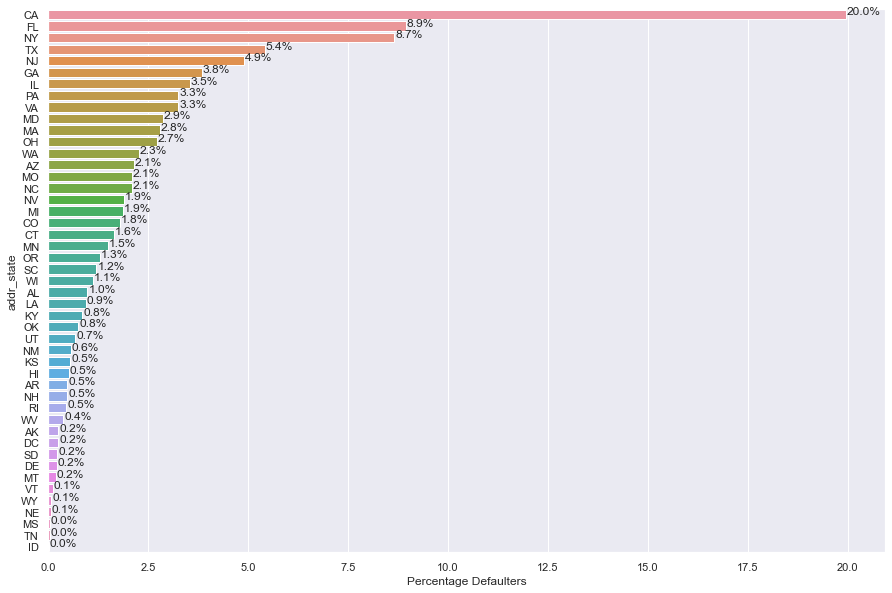

In [50]:
univariatebarplot("addr_state")

<blockquote> Large number of defaulters hail from the state of California, followed by Florida and New York </blockquote>

### CONTINUOUS UNIVARIATE ANALYSIS

#### Interest Rate

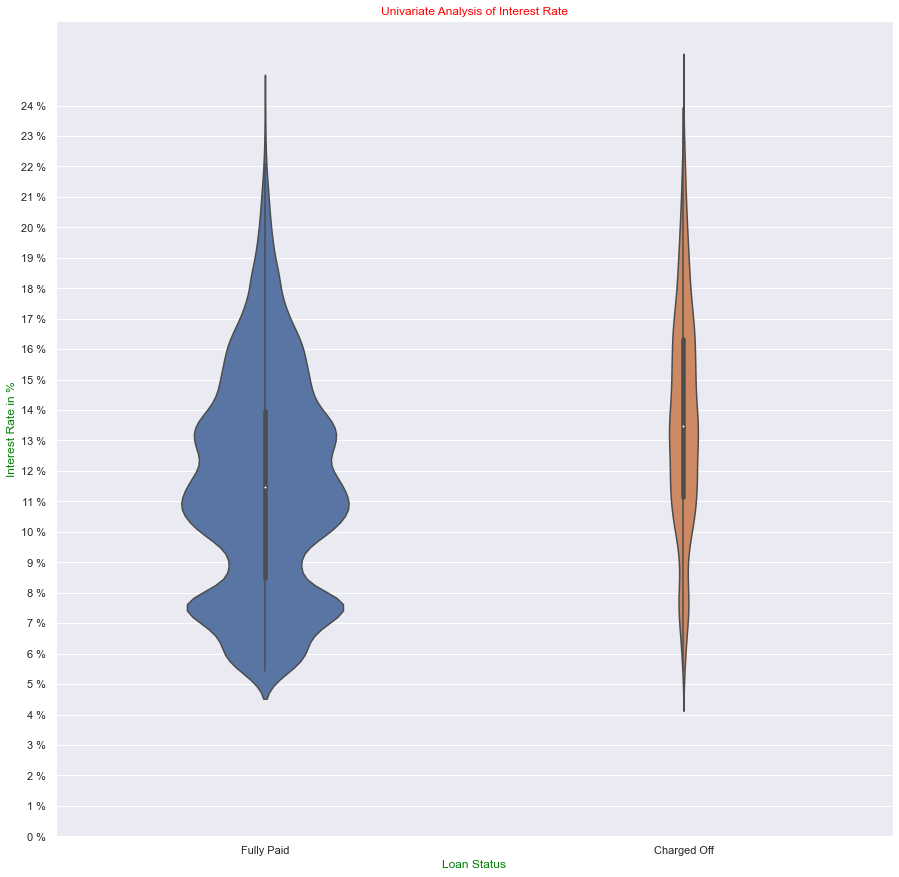

In [51]:
#Plotting a violin plot for both Fully Paid and Default to understand the threshold between a fully paid and charged off loan interest rate.
# The plot has been scaled on the COUNT basis - since we can observe that the number of paid off loans is way more than charged off ones
temp1 = loan[~(loan["loan_status"] == "Current")]
sns.set(rc = {"figure.figsize" : (15,15)})
sns.violinplot(x = temp1.loan_status, y = temp1.int_rate, width = 0.4, inner = "box", scale = "count")
plt.title("Univariate Analysis of Interest Rate",fontdict = {"fontweight" : 20, "color" : "red"})
plt.xlabel("Loan Status",fontdict = {"fontweight" : 10, "color" : "green"})
plt.ylabel("Interest Rate in %",fontdict = {"fontweight" : 10, "color" : "green"})
ticks = np.arange(0,25,1)
label = ["{} %".format(i) for i in ticks]
plt.yticks(ticks,label)
plt.show()

<blockquote> The median interest rate of Charged Off Loan is 13.5% whereas for loans that are fully paid are 11.5%. Since the First Quartile of default loans are approximately at 11% we can conclude that interest rates that <b> go beyond 11% has more chance to default.</b> Additionally the chances <b> to default are highest in the interest rate range of 11-16% </b></blockquote>

#### Employement Length - Modified

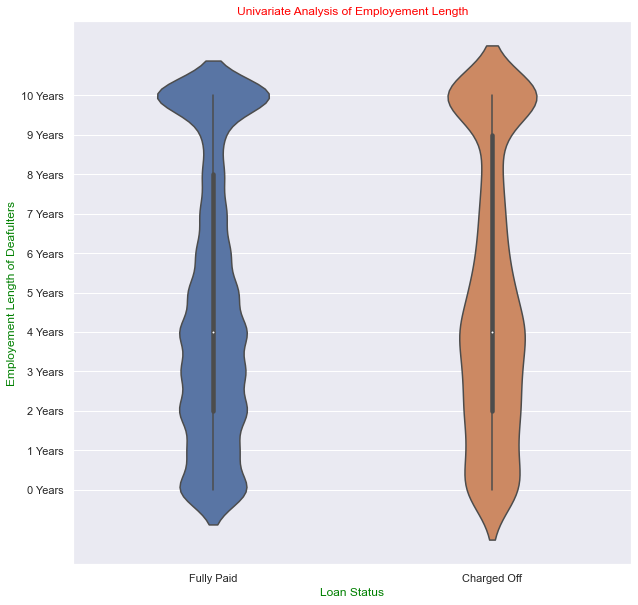

In [52]:
#Plotting a violin plotjust for Defaulters
sns.set(rc = {"figure.figsize" : (10,10)})
sns.violinplot(x = temp1.loan_status, y = temp1.emp_length_modified, width = 0.4, inner = "box")
plt.title("Univariate Analysis of Employement Length",fontdict = {"fontweight" : 20, "color" : "red"})
plt.xlabel("Loan Status",fontdict = {"fontweight" : 10, "color" : "green"})
plt.ylabel("Employement Length of Deafulters",fontdict = {"fontweight" : 10, "color" : "green"})
ticks = np.arange(0,11,1)
label = ["{} Years".format(i) for i in ticks]
plt.yticks(ticks,label)
plt.show()

<blockquote> The key learning from the visualization is that the 50% of defaulters are employed for 4 or less than 4 years. An interesting trend that we could observe here is the tendency to default reduces once the employement period moves through 5 to 9 years the tendency decreases and shoots up at 10+ years. </blockquote> 

<blockquote> <b> Initial Hypothesis : </b> 
    
    1. The major chunk of defaulters lieing between 0-4 years robably could be inability to pay off student loans, racking up charges on credit card during initial year of employement accompanied by poor financial planning just after higher education.
    
    2. The rise in defaulters after 10+ years probably could owe to the strategy of consolidating debts after being employed for 10+ years, however fail to repay the loan.
</blockquote>

#### Debt to Income Ratio (DTI)

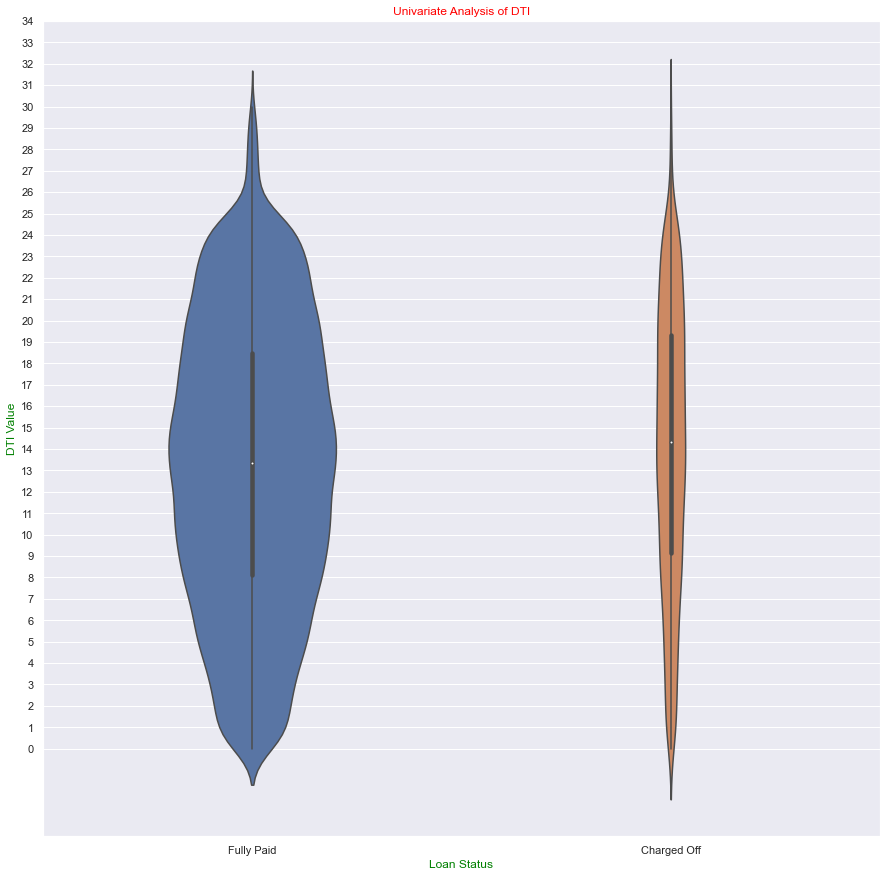

In [53]:
#Plotting a violin plot for both Fully Paid and Default to understand the dti distribution between a fully paid and charged off loan interest rate.
# The plot has been scaled on the COUNT basis - since we can observe that the number of paid off loans is way more than charged off ones
temp1 = loan[~(loan["loan_status"] == "Current")]
sns.set(rc = {"figure.figsize" : (15,15)})
sns.violinplot(x = temp1.loan_status, y = temp1.dti, width = 0.4, inner = "box", scale = "count")
plt.title("Univariate Analysis of DTI",fontdict = {"fontweight" : 20, "color" : "red"})
plt.xlabel("Loan Status",fontdict = {"fontweight" : 10, "color" : "green"})
plt.ylabel("DTI Value",fontdict = {"fontweight" : 10, "color" : "green"})
ticks = np.arange(0,35,1)
label = ["{}".format(i) for i in ticks]
plt.yticks(ticks,label)
plt.show()

<blockquote> The analysis pushes us to conclude that the median dti rates for fully paid or charged off is very close to each other with latter being slightly higher. Hence dti ratio cannot be seen as a major influencer for defaulting. In general higher is your DTI more is the debt burden over you, hence more chance it is to default. </blockquote>

## SEGMENTED UNIVARIATE ANALYSIS

In [54]:
#computing iqr
iqr2 = loan["total_pymnt"].quantile(0.75) - loan["total_pymnt"].quantile(0.25)
limit2 = 1.5*iqr2
loan = loan[loan["total_pymnt"]<(loan["total_pymnt"].quantile(0.75)+limit2)]

#### Comparison to other metrics

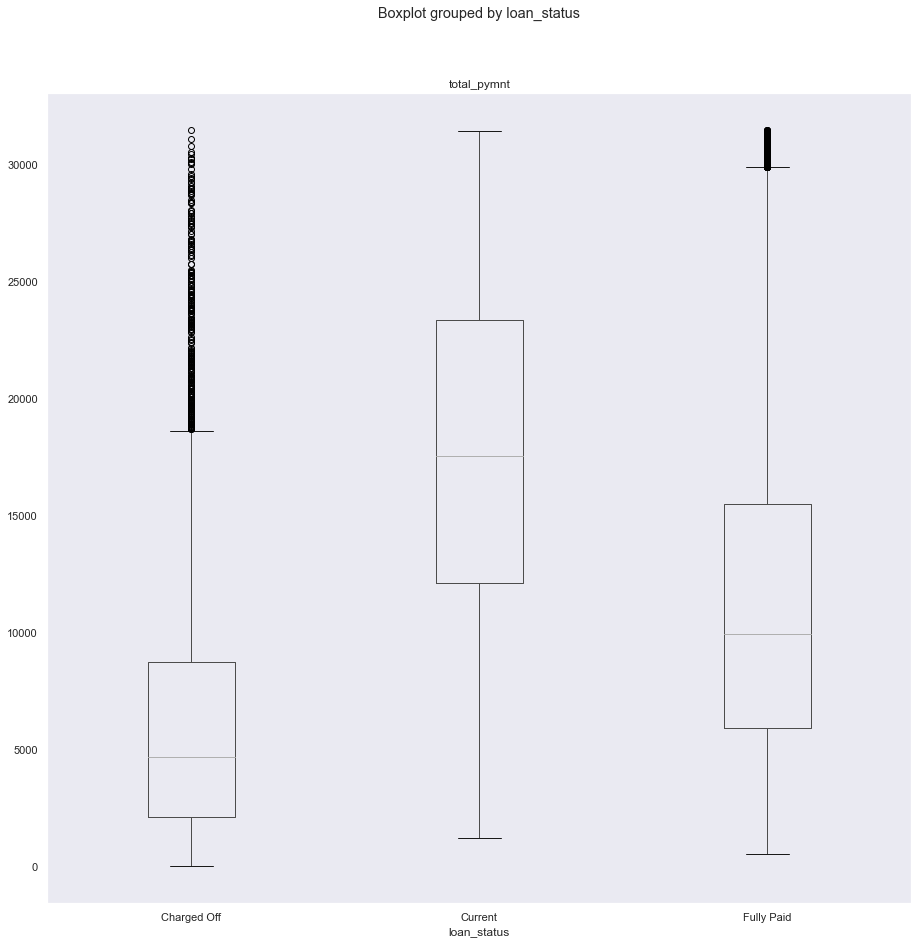

In [55]:
loan.boxplot(by='loan_status',column=['total_pymnt'],grid=False)
plt.show()

<blockquote> From the above box plot its clear that loan defaulters pay less total amount </blockquote>

## PIVOT TABLE

#### Comparision of Averages

In [56]:
pt=pd.pivot_table(loan,index="loan_status",aggfunc={'annual_inc':np.median,'loan_amnt':np.mean})
print(pt)

             annual_inc     loan_amnt
loan_status                          
Charged Off     51000.0  11629.754688
Current         56750.0  13931.061485
Fully Paid      55404.0   9827.309669


Text(0, 0.5, 'Avg anual income')

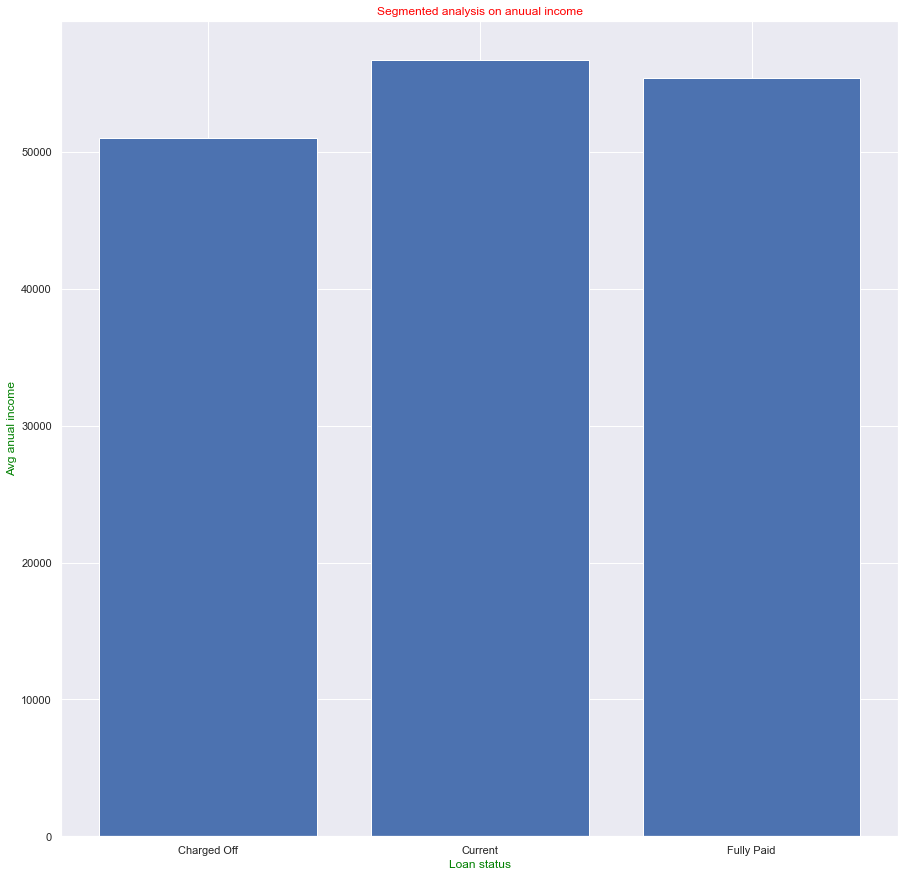

In [57]:
plt.bar(pt.index,pt.annual_inc)
plt.title("Segmented analysis on anuual income",fontdict = {"fontweight" : 20, "color" : "red"})
plt.xlabel("Loan status",fontdict = {"fontweight" : 10, "color" : "green"})
plt.ylabel("Avg anual income",fontdict = {"fontweight" : 10, "color" : "green"})

<blockquote>average income is less when defaluted</blockquote>

# Bivariate Analysis

In [58]:
corr = loan.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,emp_length_modified
id,1.000000,0.993675,0.083100,0.093710,0.206905,0.050068,0.027369,0.015804,0.097295,-0.006271,-0.046005,-0.015583,0.022655,-0.015966,-0.005236,0.094128,0.033126,0.172416,0.172399,0.071180,0.170820,0.043193,0.123896,-0.064838,0.035723,-0.012749,0.087854,0.003143,0.109588
member_id,0.993675,1.000000,0.083182,0.092923,0.218313,0.045759,0.022274,0.017801,0.097833,-0.005907,-0.050853,-0.014677,0.020228,-0.015297,-0.008402,0.092063,0.035819,0.163215,0.163193,0.072466,0.182925,0.044423,0.125506,-0.067184,0.034118,-0.014425,0.090477,0.004497,0.114262
loan_amnt,0.083100,0.083182,1.000000,0.977170,0.924632,0.242729,0.920441,0.365148,0.085857,-0.040742,-0.001694,-0.046636,0.171964,-0.041846,0.287738,0.065125,0.228531,0.135638,0.135607,0.847812,0.804886,0.797355,0.687269,0.031845,0.157600,0.079980,0.392013,-0.026694,0.139277
funded_amnt,0.093710,0.092923,0.977170,1.000000,0.946821,0.247845,0.953416,0.360422,0.085186,-0.041469,-0.000703,-0.044897,0.169181,-0.043179,0.278677,0.070355,0.222300,0.134158,0.134117,0.866101,0.822881,0.817176,0.693721,0.034065,0.161753,0.083407,0.395075,-0.028225,0.138909
funded_amnt_inv,0.206905,0.218313,0.924632,0.946821,1.000000,0.242112,0.888321,0.342819,0.095402,-0.046996,-0.018062,-0.046833,0.158723,-0.044241,0.258265,0.075005,0.217139,0.144544,0.144514,0.838410,0.879894,0.787376,0.685951,0.012096,0.147810,0.067042,0.384813,-0.027777,0.152188
int_rate,0.050068,0.045759,0.242729,0.247845,0.242112,1.000000,0.217440,0.015804,0.099896,0.155790,0.133159,0.167944,-0.064717,0.107583,0.050893,0.476356,-0.111329,0.111884,0.112056,0.221595,0.218096,0.091270,0.512237,0.086032,0.129511,0.065705,0.100235,0.092021,-0.012345
installment,0.027369,0.022274,0.920441,0.953416,0.888321,0.217440,1.000000,0.360923,0.070032,-0.029083,0.000345,-0.031179,0.157901,-0.038071,0.277392,0.099129,0.195277,0.063324,0.063341,0.830794,0.777127,0.811300,0.587229,0.041906,0.135093,0.081136,0.347739,-0.024565,0.108067
annual_inc,0.015804,0.017801,0.365148,0.360422,0.342819,0.015804,0.360923,1.000000,-0.087020,0.032385,0.026914,0.031635,0.265486,-0.008879,0.384216,0.042722,0.382226,0.027721,0.027636,0.343035,0.327304,0.344284,0.219729,-0.004432,0.038077,0.019170,0.186365,-0.005288,0.186320
dti,0.097295,0.097833,0.085857,0.085186,0.095402,0.099896,0.070032,-0.087020,1.000000,-0.033096,0.006646,-0.015609,0.303753,-0.005272,0.266773,0.277907,0.239541,0.041046,0.040967,0.080620,0.089093,0.056269,0.122359,-0.013687,0.025639,0.009881,0.015642,0.006463,0.056900
delinq_2yrs,-0.006271,-0.005907,-0.040742,-0.041469,-0.046996,0.155790,-0.029083,0.032385,-0.033096,1.000000,0.007600,0.006464,0.006860,0.006469,-0.060987,-0.040635,0.067134,-0.001927,-0.001878,-0.035340,-0.040830,-0.049929,0.016468,0.030049,0.012550,0.011849,-0.016059,0.001758,0.015462


### Creating Pair Plots

<blockquote> From the above plot we can observe that the variable show a positive corre </blockquote>

In [59]:
#choosing only loan_status that has been defaulted
temp_pp = loan[loan["loan_status"] == "Charged Off"]

<blockquote> We have considered int_rate, open_acc, loan amount, revolvng balance, revolving utility, delinq_2yrs, dti, annual_inc, installement for coming up with a pair plot </blockquote>

##### click on the image to enlarge

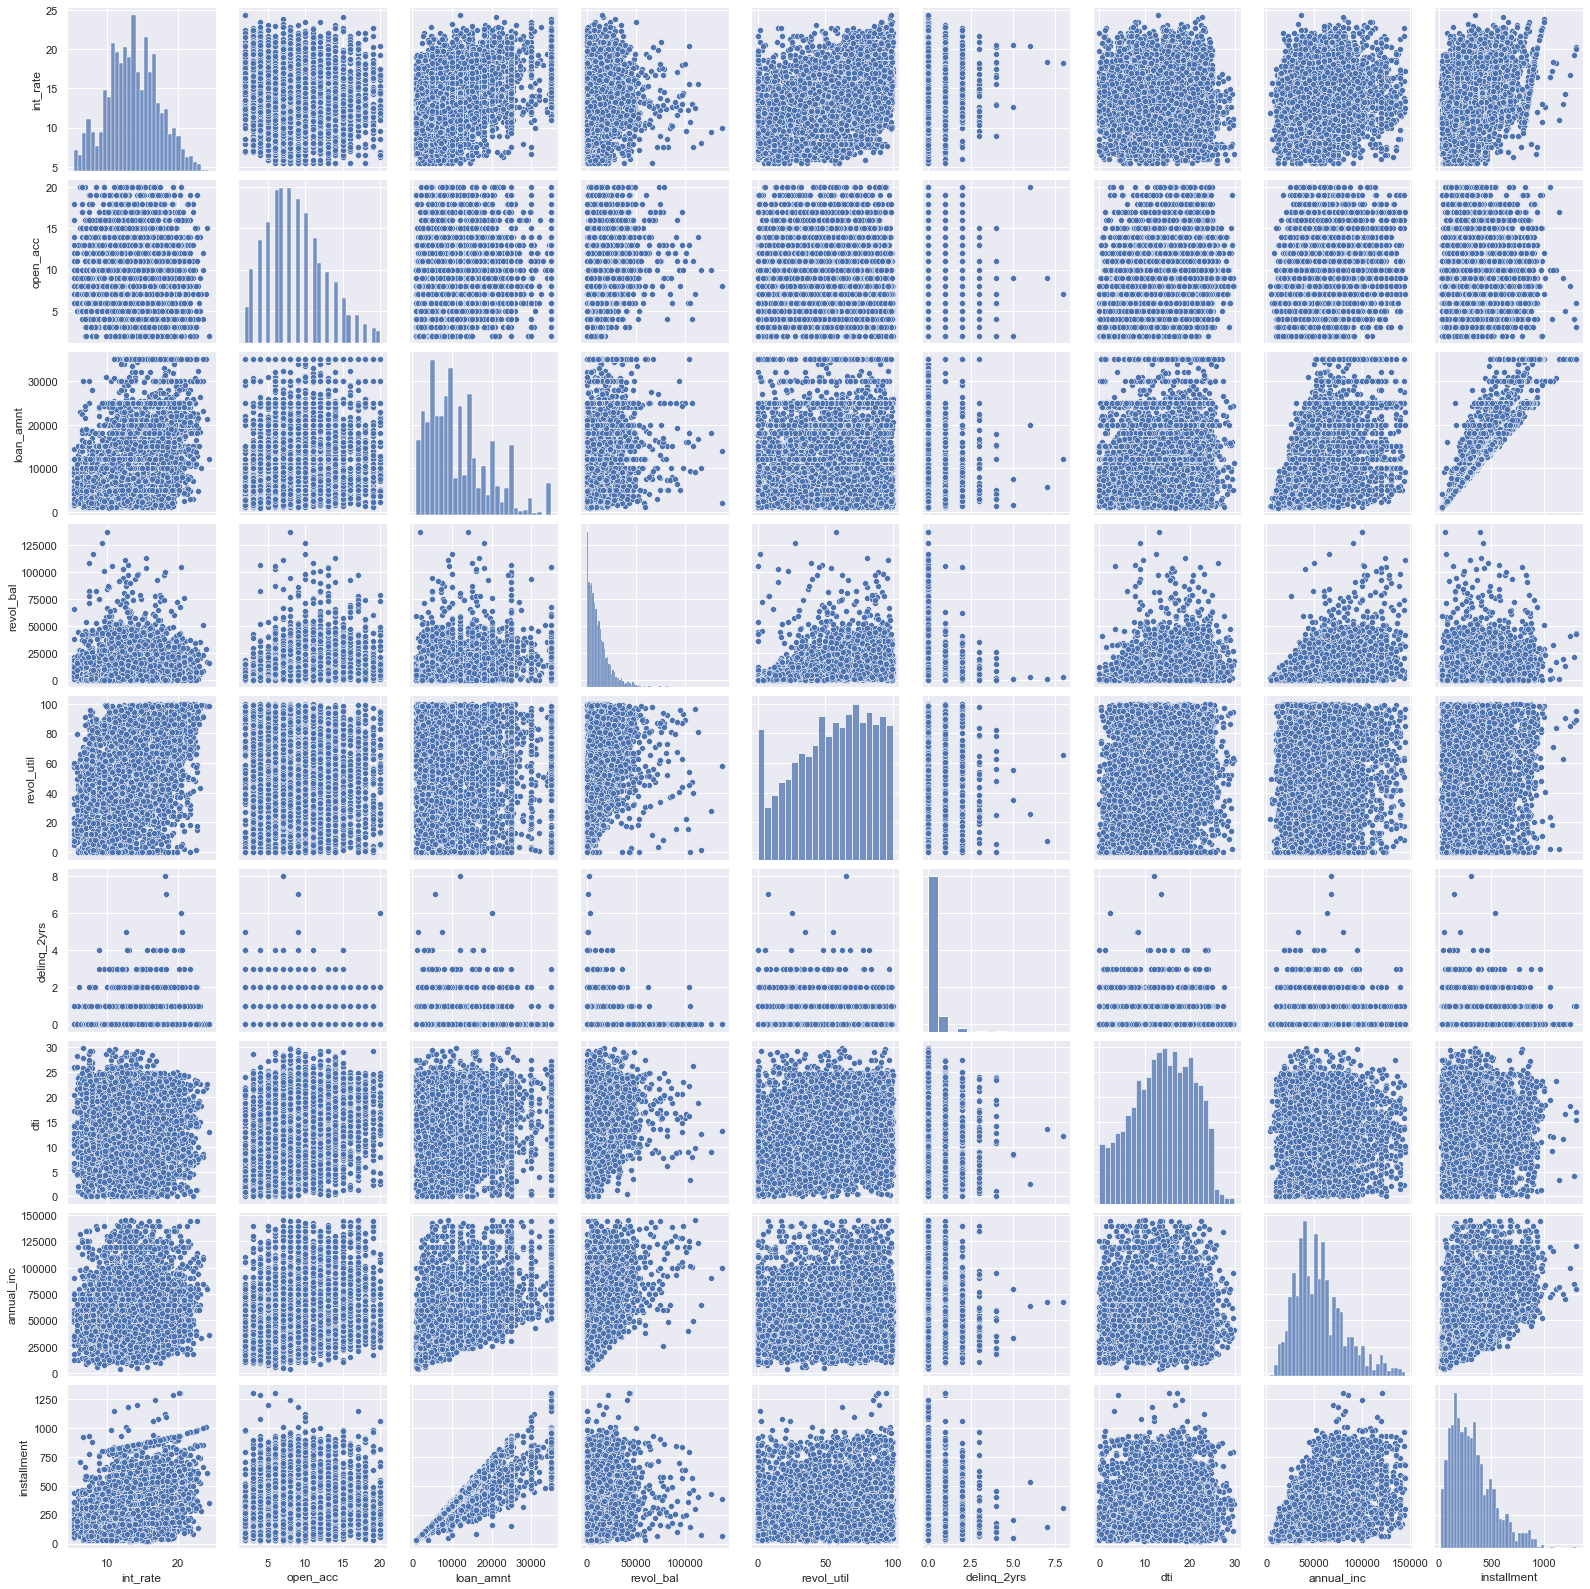

In [60]:
sns.set(rc = {"figure.figsize" : (20,20)})
sns.pairplot(temp_pp[["int_rate","open_acc","loan_amnt","revol_bal","revol_util","delinq_2yrs","dti","annual_inc","installment"]], kind = "scatter")
plt.show()

<blockquote> 

1. Since we see only straight line in scatter plots for Open Accounts against other variables it doesnot have any significant relationship rest mentioned parameters
2. The default loans' interest Rate has reduced density for higher salaries. This implies that folks with larger annual income and stable lifestyle will not default easily.
</blockquote>

### Annual Income Range and Purpose

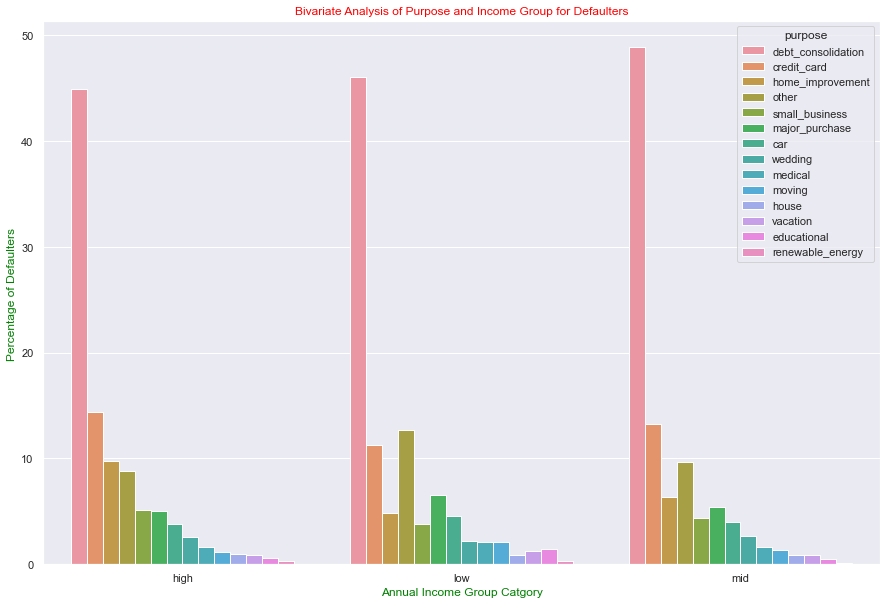

In [61]:
#Annual Income Range and Purpose Bivariate Analysis
temp = loan[loan["loan_status"] == "Charged Off"]
temp = loan.groupby(by =loan["annual_inc_grp"])["purpose"].value_counts(normalize=True).rename("Percentage_Defaulters").mul(100).reset_index()
sns.set(rc = {"figure.figsize" : (15,10)})
sns.barplot(x = temp.annual_inc_grp, y = temp["Percentage_Defaulters"], hue = temp["purpose"])
plt.ylabel("Percentage of Defaulters ",fontdict = {"fontweight" : 10, "color" : "green"})
plt.xlabel("Annual Income Group Catgory",fontdict = {"fontweight" : 10, "color" : "green"})
plt.title("Bivariate Analysis of Purpose and Income Group for Defaulters", fontdict = {"fontweight" : 10, "color" : "red"})
plt.show()

<blockquote> 
-In all income groups Debt Consolidation is the major purpose which result in largest defaultors
 
    
-High income group follow the earlier mentioned pattern where debt consolidation is high.

-Low income group has purpose <b> other </b>  rising up. They take small and short loans. There is a spike in education loans being defaulted in low income group
    
-Medium income  has large rise in credit card defaulters </blockquote> 

### Average Interest Rate and Grade Type

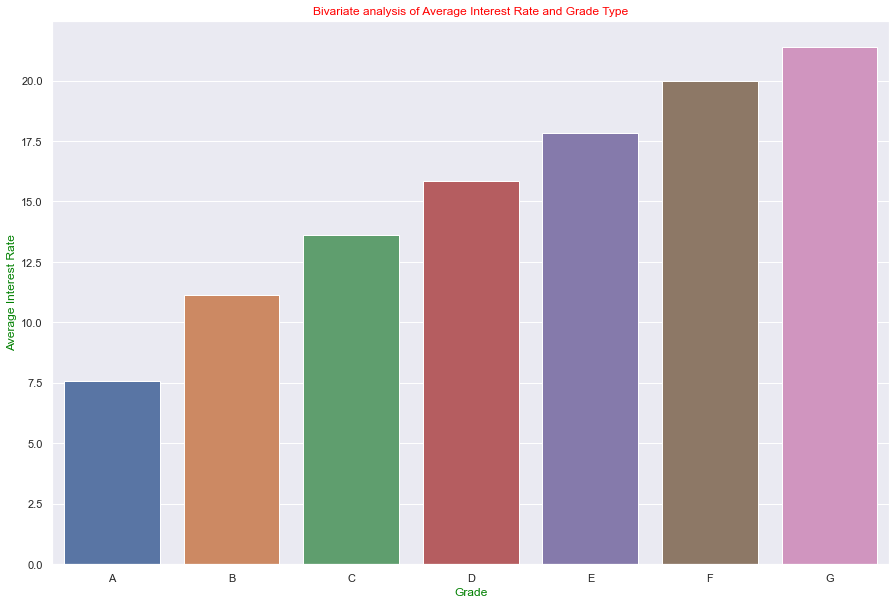

In [62]:
#creating dataset where loan status is charged off
temp_co = loan[loan["loan_status"] == "Charged Off"]
pt1=pd.pivot_table(temp_co,index="grade",aggfunc={'int_rate':np.mean})
sns.barplot(x = pt1.index, y = pt1.int_rate)
plt.title("Bivariate analysis of Average Interest Rate and Grade Type",fontdict = {"fontweight" : 20, "color" : "red"})
plt.xlabel("Grade",fontdict = {"fontweight" : 10, "color" : "green"})
plt.ylabel("Average Interest Rate",fontdict = {"fontweight" : 10, "color" : "green"})
plt.show()

<blockquote>From this we can draw one conclusion that even though interest rate is high for G grade there are less defaulters compared to grade B where average intrest rate is low </blockquote>

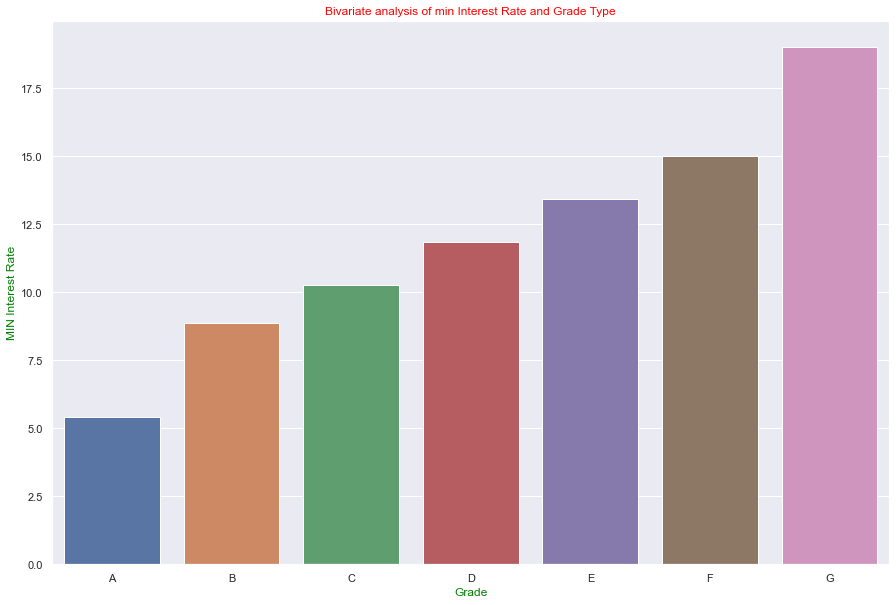

In [63]:
temp_co = loan[loan["loan_status"] == "Charged Off"]
pt2=pd.pivot_table(temp_co,index="grade",aggfunc={'int_rate':np.min})
sns.barplot(x = pt2.index, y = pt2.int_rate)
plt.title("Bivariate analysis of min Interest Rate and Grade Type",fontdict = {"fontweight" : 20, "color" : "red"})
plt.xlabel("Grade",fontdict = {"fontweight" : 10, "color" : "green"})
plt.ylabel("MIN Interest Rate",fontdict = {"fontweight" : 10, "color" : "green"})
plt.show()

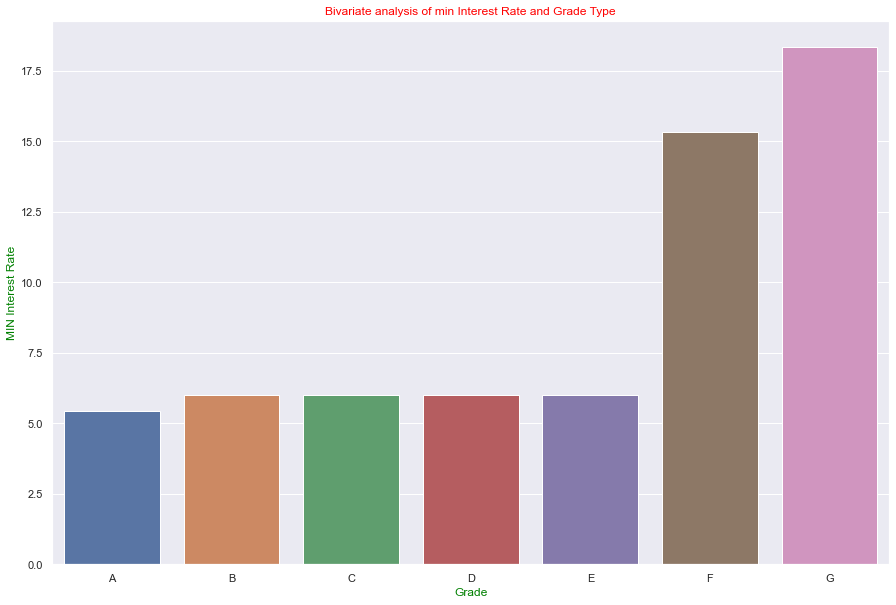

In [64]:
temp_fp = loan[loan["loan_status"] == "Fully Paid"]
pt3=pd.pivot_table(temp_fp,index="grade",aggfunc={'int_rate':np.min})
sns.barplot(x = pt3.index, y = pt3.int_rate)
plt.title("Bivariate analysis of min Interest Rate and Grade Type",fontdict = {"fontweight" : 20, "color" : "red"})
plt.xlabel("Grade",fontdict = {"fontweight" : 10, "color" : "green"})
plt.ylabel("MIN Interest Rate",fontdict = {"fontweight" : 10, "color" : "green"})
plt.show()

<blockquote> from the above two graph we can observe that min interest rate is almost constant till E grade for full paid customers whereas in charged off the min interest rate keeps on inreasing </blockquote>